In [1]:
from PIL import Image

# Bases de Datos Relacionales | Proyecto Final
## Análisis de Sentimientos

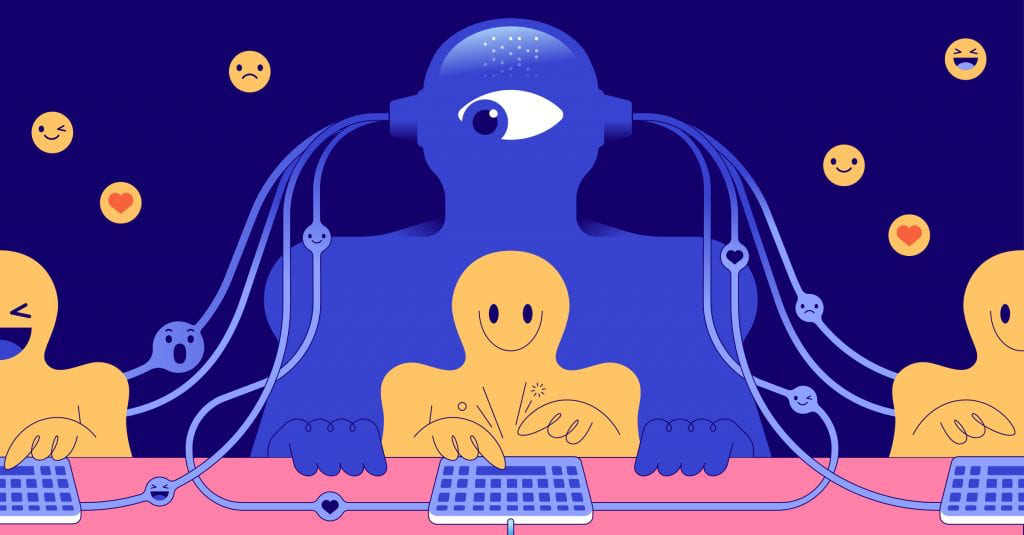

In [2]:
Image.open('C:/Users/6QW09LA_1909/OneDrive/Escritorio/1ER TETRA/BASES DE DATOS RELACIONALES/PROYECTO/Imagenes/analisis_sentimientos_1.jpg')

#### Librerías 

In [5]:
import pandas as pd
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

import dataclasses
import spacy

import mysql.connector
#import matplotlib.pyplot as plt

#import nltk
#nltk.download('vader_lexicon')
#pip install mysql-connector-python

#### Conexión a Base de datos 

In [6]:
cnx = mysql.connector.connect(user='root', password = 'MCD_EDWIN_ROMERO_9978',
                              host='localhost', database='proyecto_bdr')

# Crear un cursor para ejecutar consultas
cursor = cnx.cursor()

In [65]:
# Ejecutar una consulta
query = "SELECT * FROM imdb_reviews"
cursor.execute(query)

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Obtener los nombres de las columnas
column_names = [desc[0] for desc in cursor.description]

# Crear un DataFrame a partir de los resultados y los nombres de las columnas
df = pd.DataFrame(results, columns=column_names)

df = df[0:2000]
df[0:3]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


#### Lectura de DataFrame (Por si no funciona la conexión)

## 1)SentimentIntensityAnalyzer (Inglés)

In [63]:
#Aplicar la función en una cadena de texto
sia = SentimentIntensityAnalyzer()

x = 'it is a charming and beautiful product'
x = 'I really hate this product'


resultados = sia.polarity_scores(x)

#Nos devuelve un diccionario como resultado
#Compound va entre -1 y 1
resultados

{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'compound': -0.6115}

In [66]:
def aplicar_score(x):
    resultado = sia.polarity_scores(x)
    resultado = resultado['compound']
    return resultado
df['Sentimiento_sia'] = df['review'].apply(aplicar_score)

def clasificar_score(x):
    if (x < -0):
        resultado = 'negative'
    elif (x >= 0):
        resultado = 'positive'
    else:
        resultado = 'Error'
    return resultado

df['Clasificacion_sia'] = df['Sentimiento_sia'].apply(clasificar_score)

df

,review,sentiment,Sentimiento_sia,Clasificacion_sia
0,One of the other reviewers has mentioned that ...,positive,-0.9951,negative
1,A wonderful little production. <br /><br />The...,positive,0.9641,positive
2,I thought this was a wonderful way to spend ti...,positive,0.9605,positive
3,Basically there's a family where a little boy ...,negative,-0.9213,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,positive
...,...,...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...",negative,-0.7414,negative
1996,THE CELL (2000) Rating: 8/10<br /><br />The Ce...,positive,0.9943,positive
1997,"This movie, despite its list of B, C, and D li...",negative,-0.5893,negative
1998,I loved this movie! It was all I could do not ...,positive,-0.5917,negative


In [14]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(df['sentiment'], df['Clasificacion_sia'])

matriz_confusion = pd.DataFrame(matriz_confusion)
matriz_confusion = pd.DataFrame(matriz_confusion*100/df.shape[0])
matriz_confusion.columns = ['negative', 'positive']
matriz_confusion.index = ['negative', 'positive']
matriz_confusion

,negative,positive
negative,27.75,22.0
positive,6.55,43.7


## 2) Sentiment.polarity de TextBlob  (Inglés)

In [68]:
from textblob import TextBlob

texto = "I hate this product"
texto = "Odio este producto"

sentimiento = TextBlob(texto).sentiment.polarity
print(sentimiento)

#En la biblioteca TextBlob, la polaridad del sentimiento varía entre -1 y 1. 
#Un valor de 0 indica una neutralidad en el sentimiento.

0.0


In [69]:
def aplicar_score(texto):
    sentimiento = TextBlob(texto).sentiment.polarity
    return sentimiento
df['Sentimiento_textblob'] = df['review'].apply(aplicar_score)

def clasificar_score(x):
    if (x < -0):
        
        
        resultado = 'negative'
    elif (x >= 0):
        resultado = 'positive'
    else:
        resultado = 'Error'
    return resultado

df['Clasificacion_textblob'] = df['Sentimiento_textblob'].apply(clasificar_score)
df

,review,sentiment,Sentimiento_sia,Clasificacion_sia,Sentimiento_textblob,Clasificacion_textblob
0,One of the other reviewers has mentioned that ...,positive,-0.9951,negative,0.023433,positive
1,A wonderful little production. <br /><br />The...,positive,0.9641,positive,0.109722,positive
2,I thought this was a wonderful way to spend ti...,positive,0.9605,positive,0.354008,positive
3,Basically there's a family where a little boy ...,negative,-0.9213,negative,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,positive,0.217952,positive
...,...,...,...,...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...",negative,-0.7414,negative,-0.145930,negative
1996,THE CELL (2000) Rating: 8/10<br /><br />The Ce...,positive,0.9943,positive,0.194022,positive
1997,"This movie, despite its list of B, C, and D li...",negative,-0.5893,negative,-0.125771,negative
1998,I loved this movie! It was all I could do not ...,positive,-0.5917,negative,-0.000505,negative


In [20]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(df['sentiment'], df['Clasificacion_textblob'])
matriz_confusion = pd.DataFrame(matriz_confusion*100/df.shape[0])
matriz_confusion = pd.DataFrame(matriz_confusion)
matriz_confusion.columns = ['negative', 'positive']
matriz_confusion.index   = ['negative', 'positive']
matriz_confusion

,negative,positive
negative,22.10,27.65
positive,2.95,47.30


In [21]:
df.groupby(['Clasificacion_textblob'])[['Sentimiento_textblob']].mean()
df.groupby(['sentiment'])[['Sentimiento_sia','Sentimiento_textblob']].mean()

,Sentimiento_sia,Sentimiento_textblob
sentiment,,
negative,-0.113658,0.003110
positive,0.691323,0.190457


## 3) Spacy + sklearn (Se puede en Español)

In [22]:
import dataclasses
import spacy

#### 3.1) Funcionamiento 

In [72]:
#!python -m spacy download es_core_news_sm
#Descargamos las funciones en español
nlp = spacy.load('es_core_news_sm')

#Definimos una cadena de texto
text = 'Me encanta este producto'

doc = nlp(text)

type(text)
type(doc)
doc

Me encanta este producto

In [73]:
#Elimina palabras irrelevantes y signos de puntuación (Nos las entrega en una lista)
tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
tokens

['encantar', 'producto']

In [74]:
#Convertimos la lista nuevamente en una cadena de texto
preprocessed_text = ' '.join(tokens)
preprocessed_text

'encantar producto'

In [75]:
#Creamos un diccionario con todas las palabras relevantes que contiene la cadena de texto
#El diccionario incliye la cantidad que se repite la palabra
features = {}
doc = nlp(preprocessed_text)

for token in doc:
    if not token.is_stop and not token.is_punct:
        if token.lemma_.lower() in features:
            features[token.lemma_.lower()] += 1
        else:
            features[token.lemma_.lower()] = 1
            
features

{'encantar': 1, 'producto': 1}

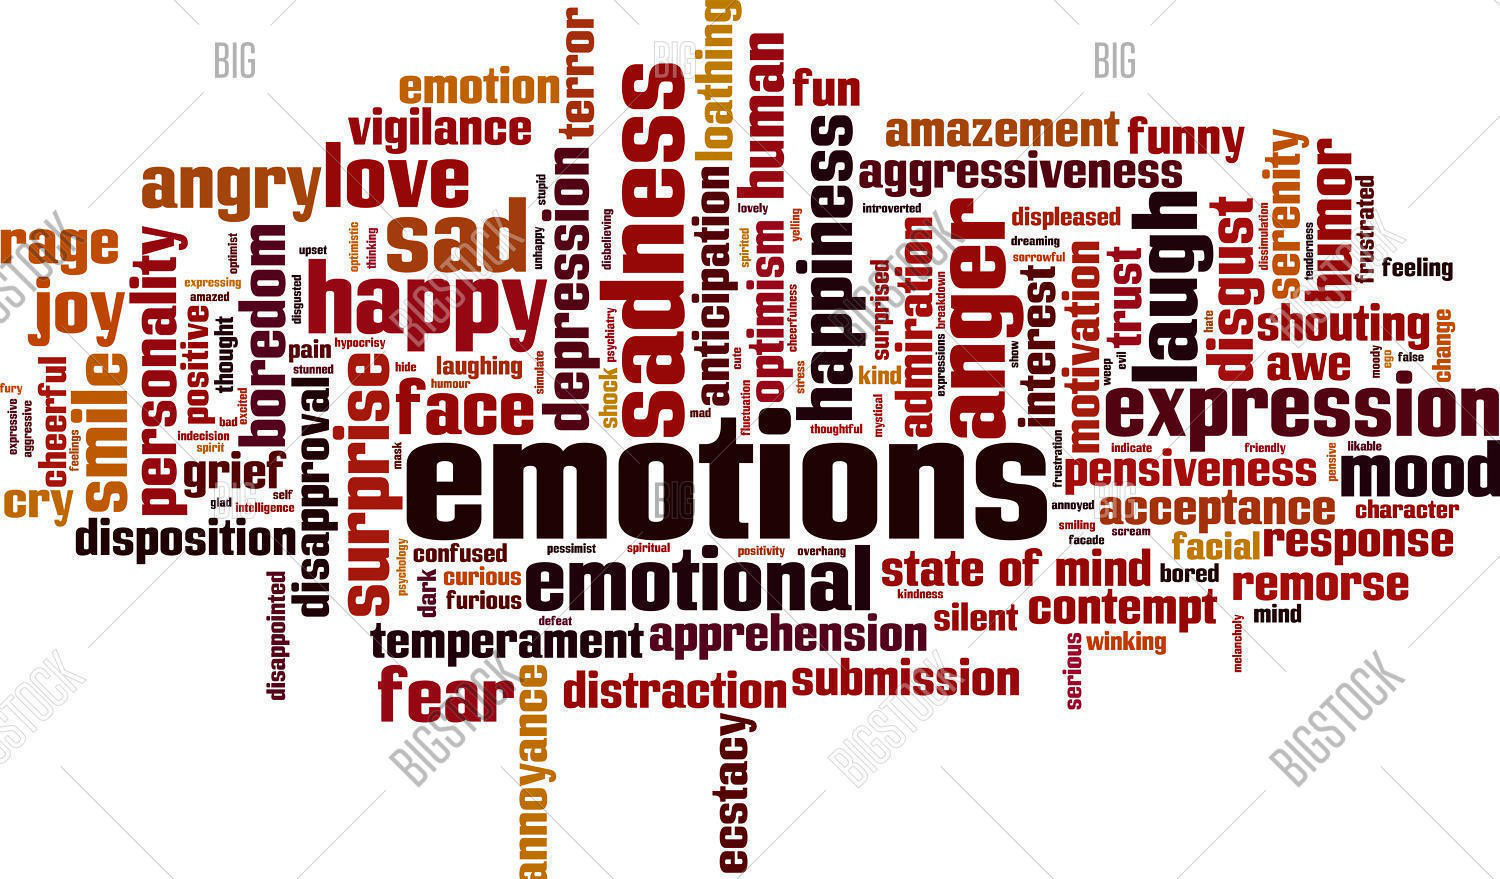

In [31]:
Image.open('C:/Users/6QW09LA_1909/OneDrive/Escritorio/1ER TETRA/BASES DE DATOS RELACIONALES/PROYECTO/Imagenes/analisis_sentimientos_2.jpg')

#### 3.2) Entrenamiento DataFrame 

In [76]:
training_data = [
    ("Me encanta el contenido del blog de Analytics Lane, los artículos son fantásticos.", "positivo"),
    ("El código no funciona, me ha dado un error al ejecutarlo.", "negativo"),
    ("Me encanta este producto.", "positivo"),
    ("Esta película fue terrible.", "negativo"),
    ("El clima está agradable hoy.", "positivo"),
    ("Me siento triste por las noticias.", "negativo"),
    ("Me deprime esta pelicula.", "negativo"),
    ("Me siento genial por las noticias.", "positivo"),
    ("Amo ver futbol.", "positivo"),
    ("Me siento muy mal por las noticias.", "negativo"),
    ("Me siento deprimido por las noticias.", "negativo"),
    ("Es solo un libro promedio.", "neutral"),
    ("El servicio en este restaurante es excelente.", "positivo"),
    ("No estoy satisfecho con el servicio al cliente.", "negativo"),
    ("Las vacaciones fueron increíbles y relajantes.", "positivo"),
    ("El tráfico esta mañana fue terrible.", "negativo"),
    ("Estoy emocionado por el próximo evento.", "positivo"),
    ("El resultado del examen fue desalentador.", "negativo"),
    ("Disfruté mucho leyendo este libro.", "positivo"),
    ("El precio del producto es demasiado alto.", "negativo"),
    ("La comida en este lugar es deliciosa.", "positivo"),
    ("El espectáculo de anoche fue aburrido.", "negativo"),
    ("Me siento agradecido por todas las oportunidades.", "positivo"),
    ("Me siento contento por haberte conocido.", "positivo"),
    ("La calidad del producto es pobre.", "negativo"),
    ("El nuevo diseño del sitio web es fantástico.", "positivo"),
    ("No me gustó la calidad del servicio.", "negativo"),
    ("El entrenamiento fue muy útil y productivo.", "positivo"),
    ("El servicio de entrega es lento y poco confiable.", "negativo"),
    ("Me siento animado por los comentarios positivos.", "positivo"),
    ("Estoy feliz por acabar mi proyecto.", "positivo"),
    ("La situación actual es preocupante.", "negativo"),
    ("Me encantan las vacaciones en la playa.", "positivo"),
    ("El rendimiento del dispositivo es deficiente.", "negativo")]

In [77]:
df = pd.DataFrame(training_data)
df.columns = ['Review', 'Etiqueta']
df[0:3]

,Review,Etiqueta
0,Me encanta el contenido del blog de Analytics ...,positivo
1,"El código no funciona, me ha dado un error al ...",negativo
2,Me encanta este producto.,positivo


In [78]:
#Definmos funciones que realizan los pasos anteriores
def preprocess_text(text):

    nlp = spacy.load('es_core_news_sm')
    doc = nlp(text)

    # Eliminación de palabras irrelevantes (stopwords) y signos de puntuación
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    # Reconstrucción del texto preprocesado
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


def extract_features(text):
    
    features = {}
    doc = nlp(text)
    for token in doc:
        if not token.is_stop and not token.is_punct:
            if token.lemma_.lower() in features:
                features[token.lemma_.lower()] += 1
            else:
                features[token.lemma_.lower()] = 1
    return features

In [79]:
df['Review_procesada'] = df['Review'].apply(preprocess_text)
df[0:3]

,Review,Etiqueta,Review_procesada
0,Me encanta el contenido del blog de Analytics ...,positivo,encantar contenido blog analytics lane artícul...
1,"El código no funciona, me ha dado un error al ...",negativo,código funcionar error ejecutar él
2,Me encanta este producto.,positivo,encantar producto


In [81]:
df['training_feat'] = df['Review_procesada'].apply(extract_features)
df[0:3]

,Review,Etiqueta,Review_procesada,training_feat
0,Me encanta el contenido del blog de Analytics ...,positivo,encantar contenido blog analytics lane artícul...,"{'encantar': 1, 'contenido': 1, 'blog': 1, 'an..."
1,"El código no funciona, me ha dado un error al ...",negativo,código funcionar error ejecutar él,"{'códecir': 1, 'funcionar': 1, 'error': 1, 'ej..."
2,Me encanta este producto.,positivo,encantar producto,"{'encantar': 1, 'producto': 1}"


#### 3.2.1) x_train 

In [84]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = DictVectorizer(sparse=False)
X_train = vectorizer.fit_transform(df['training_feat'])
X_train.shape

(34, 82)

#### 3.2.2) y_train

In [85]:
y_train = df['Etiqueta']
y_train[0:3]

0    positivo
1    negativo
2    positivo
Name: Etiqueta, dtype: object

#### 3.2.3) fit 

In [86]:
# Entrenamiento del clasificador Naive Bayes
classifier = MultinomialNB()
_ = classifier.fit(X_train, y_train)
_

MultinomialNB()

In [89]:
# Nuevo texto para clasificar
new_text = "Odio este producto."

# Preprocesamiento del nuevo texto
preprocessed_text = preprocess_text(new_text)

# Extracción de características del nuevo texto
features = extract_features(preprocessed_text)
X_test = vectorizer.transform([features])

# Clasificación del nuevo texto
sentiment = classifier.predict(X_test)
print("Sentimiento:", sentiment[0])

Sentimiento: negativo


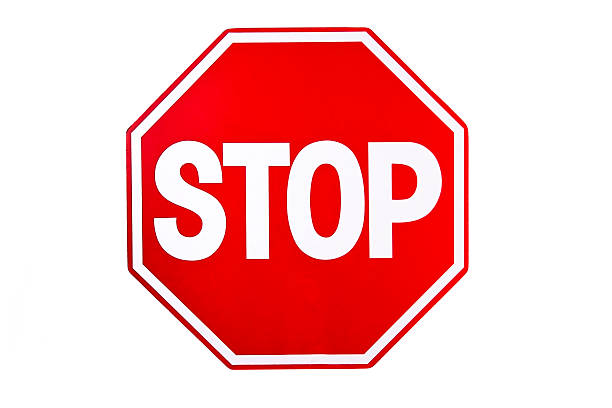

In [59]:
Image.open('C:/Users/6QW09LA_1909/OneDrive/Escritorio/1ER TETRA/BASES DE DATOS RELACIONALES/PROYECTO/Imagenes/stop.jpg')